In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math
%matplotlib inline
from mpl_toolkits.basemap import Basemap
from PIL import Image
from pylab import rcParams
import string
import random

In [2]:
df = pd.read_csv('trawlers.csv')
df.head()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
0,1.252340e+12,1.325376e+09,0.0,0.0,0.0,153.0,52.458649,4.581200,-1.0,gfw
1,1.252340e+12,1.325378e+09,0.0,0.0,0.0,153.0,52.458668,4.581167,-1.0,gfw
2,1.252340e+12,1.325379e+09,0.0,0.0,0.0,153.0,52.458633,4.581183,-1.0,gfw
3,1.252340e+12,1.325380e+09,0.0,0.0,0.0,153.0,52.458649,4.581234,-1.0,gfw
4,1.252340e+12,1.325381e+09,0.0,0.0,0.0,153.0,52.458649,4.581183,-1.0,gfw


In [3]:
df.tail()

,mmsi,timestamp,distance_from_shore,distance_from_port,speed,course,lat,lon,is_fishing,source
4369096,1.838128e+14,1.480031e+09,172998.640625,239263.859375,11.2,166.800003,-42.847645,175.192535,-1.0,false_positives
4369097,1.838128e+14,1.480031e+09,173595.859375,240246.062500,11.7,163.100006,-42.853741,175.194473,-1.0,false_positives
4369098,1.838128e+14,1.480031e+09,174995.703125,241416.937500,11.2,168.699997,-42.860050,175.196487,-1.0,false_positives
4369099,1.838128e+14,1.480031e+09,174995.703125,241416.937500,11.5,169.100006,-42.863056,175.197464,-1.0,false_positives
4369100,1.838128e+14,1.480031e+09,175597.515625,242398.671875,11.0,163.800003,-42.869095,175.199799,-1.0,false_positives


In [4]:
df.is_fishing.unique()

array([-1.        ,  0.        ,  1.        ,  0.6666667 ,  0.33333334,
        0.75      ,  0.25      ])

In [5]:
df.source.unique()

array(['gfw', 'dalhousie_trawl', 'false_positives'], dtype=object)

In [6]:
len(df)

4369101

In [7]:
# FP = df.loc[df.source =='false_positives', :]
# df = df.loc[df.source != 'false_positives', :]

In [8]:
# len(FP)

In [9]:
# len(df)

In [10]:
len(df.mmsi.unique())

49

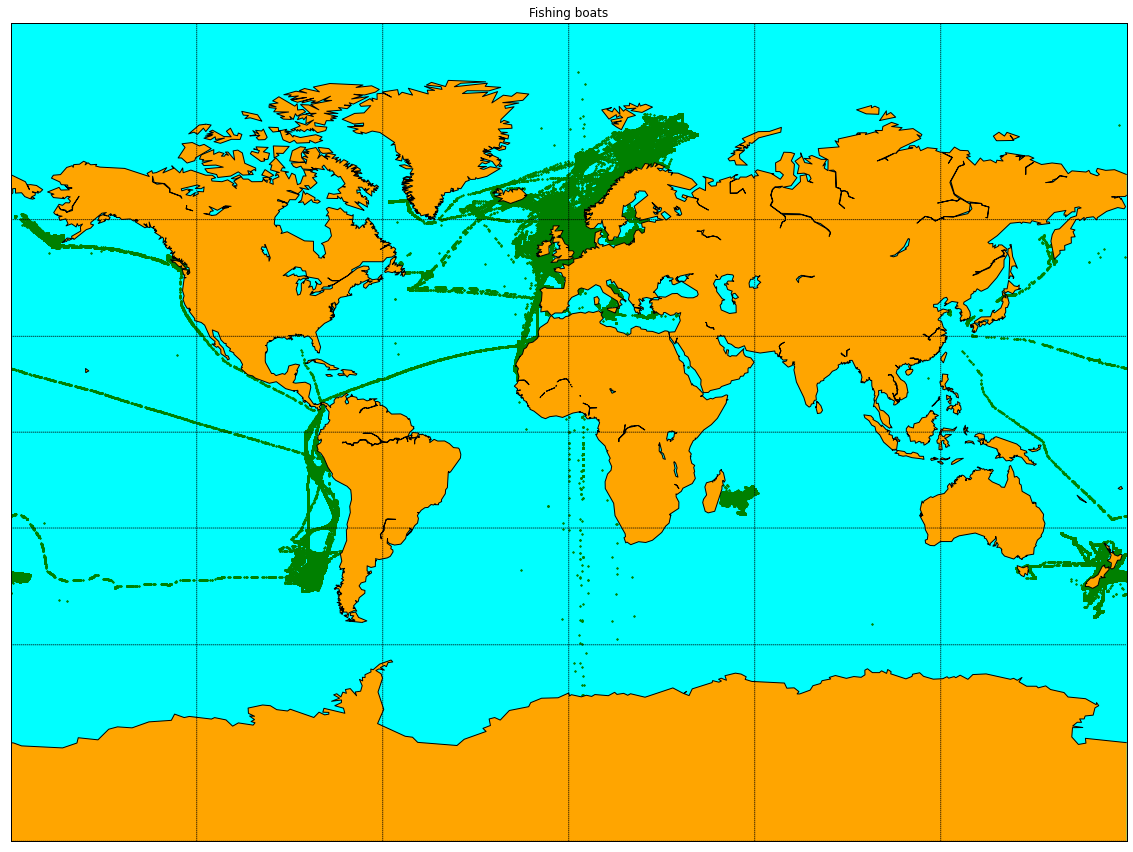

In [11]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lon_array = df.lon.to_numpy()
lat_array = df.lat.to_numpy()
x,y = m(lon_array,lat_array)
m.scatter(x,y,color="green",marker='D',s=np.pi/2)
plt.title("Fishing boats")
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [12]:
mmsi_numbers = df['mmsi'].unique().tolist()

In [13]:
len(mmsi_numbers)

49

In [18]:
# # run until value matches len(mmsi_numbers)

letters = string.ascii_lowercase
Ls1 = ''.join(random.choice(letters) for i in range(len(mmsi_numbers)+1))
letters = string.ascii_uppercase
Ls2 = ''.join(random.choice(letters) for i in range(len(mmsi_numbers)+1))
list_Ls1 = list(Ls1)
list_Ls2 = list(Ls2)
Names = []
for i in range(len(mmsi_numbers)):
    Names.append(list_Ls1[i]+list_Ls2[i])
len(set(Names))

49

In [19]:
len(Names)

49

In [21]:
for i in range(len(Names)):
    Names[i] = df[df['mmsi']==mmsi_numbers[i]]        

In [26]:
print(Names[40])

                 mmsi     timestamp  distance_from_shore  distance_from_port  \
3850863  4.083411e+13  1.337815e+09             0.000000        34013.867188   
3850864  4.083411e+13  1.337819e+09         14999.631836        52238.546875   
3850865  4.083411e+13  1.337821e+09         19104.503906        61129.507812   
3850866  4.083411e+13  1.339628e+09          2828.357666        31144.058594   
3850867  4.083411e+13  1.340756e+09         12369.013672        48998.796875   
...               ...           ...                  ...                 ...   
3927390  4.083411e+13  1.480014e+09          3162.200195        28017.164062   
3927391  4.083411e+13  1.480015e+09          3162.200195        28017.164062   
3927392  4.083411e+13  1.480016e+09          2236.013184        28843.703125   
3927393  4.083411e+13  1.480017e+09             0.000000        24041.039062   
3927394  4.083411e+13  1.480018e+09             0.000000        25709.291016   

         speed      course        lat  

In [36]:
colors = []
for i in range(len(mmsi_numbers)):

    r = random.random()
    b = random.random()
    g = random.random()
    colors.append((r, g, b))

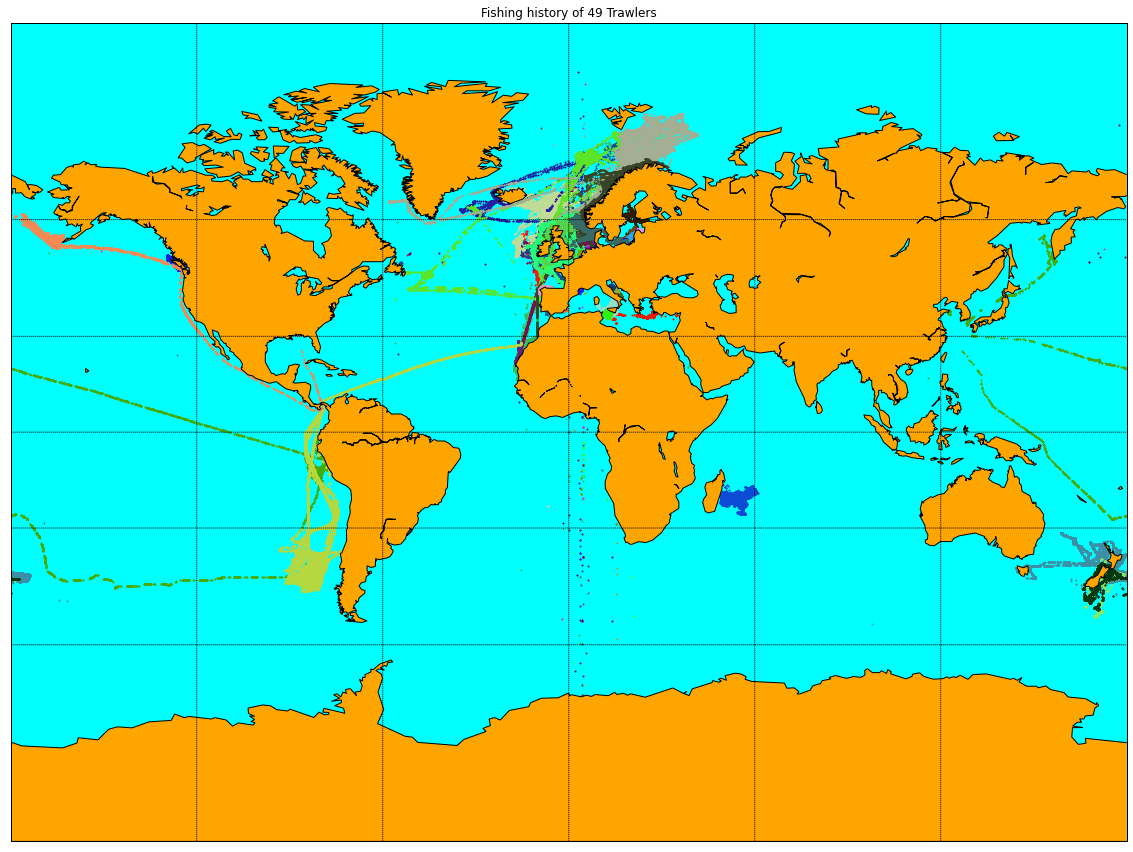

In [39]:
plt.figure(figsize=(20,20))

m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
            llcrnrlon=-180,urcrnrlon=180,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')
# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

for i in range(len(Names)):
        lon_array = Names[i].lon.to_numpy()
        lat_array = Names[i].lat.to_numpy()
        x,y = m(lon_array,lat_array)
        m.scatter(x,y,color=colors[i],marker='D',s=np.pi/4)
plt.title("Fishing history of 49 Trawlers")
plt.show()
#Download the Map
# plt.savefig("ExampleMap.png", dpi=300)